In [2]:
!git clone https://github.com/facebookresearch/segment-anything.git

Cloning into 'segment-anything'...


In [1]:
!pip install segment-anything

Defaulting to user installation because normal site-packages is not writeable



In [1]:
!pip install opencv-python matplotlib onnxruntime onnx

Defaulting to user installation because normal site-packages is not writeable























In [2]:
!pip install pycocotools

Defaulting to user installation because normal site-packages is not writeable


  Using cached pycocotools-2.0.8-cp311-cp311-win_amd64.whl.metadata (1.1 kB)












Using cached pycocotools-2.0.8-cp311-cp311-win_amd64.whl (85 kB)




In [6]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [4]:
import torch

In [5]:
import segment_anything
# print(segment_anything.__version__)

In [1]:
# It takes a loge time to download it so i download the file seperately with idm
# !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

^C


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator

In [6]:
# Load the Segment Anything Model
model_type = "vit_h"  
sam = sam_model_registry[model_type]("sam_vit_h_4b8939.pth")

C:\Users\Maryam\AppData\Roaming\Python\Python311\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

  state_dict = torch.load(f)


In [11]:
# Check if CUDA is available
gpu_available = torch.cuda.is_available()

# Get the name of the GPU if available
gpu_name = torch.cuda.get_device_name(0) if gpu_available else "No GPU Available"

print(f"GPU Available: {gpu_available}")
print(f"GPU Name: {gpu_name}")

GPU Available: True

GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [9]:
device = torch.device('cuda')
sam.to(device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [10]:
predictor = SamPredictor(sam)

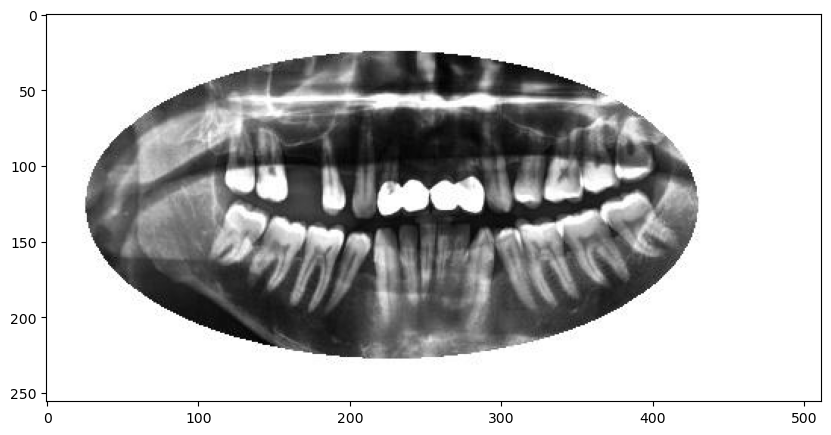

In [32]:
import cv2
import matplotlib.pyplot as plt

# Load a grayscale dental X-ray image
image_path = r"dataset\train\0001_jpg.rf.30a42966fb9c51553f6949b70234218d.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

In [29]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [30]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [33]:
predictor.set_image(image)

In [34]:
masks = mask_generator.generate(image)

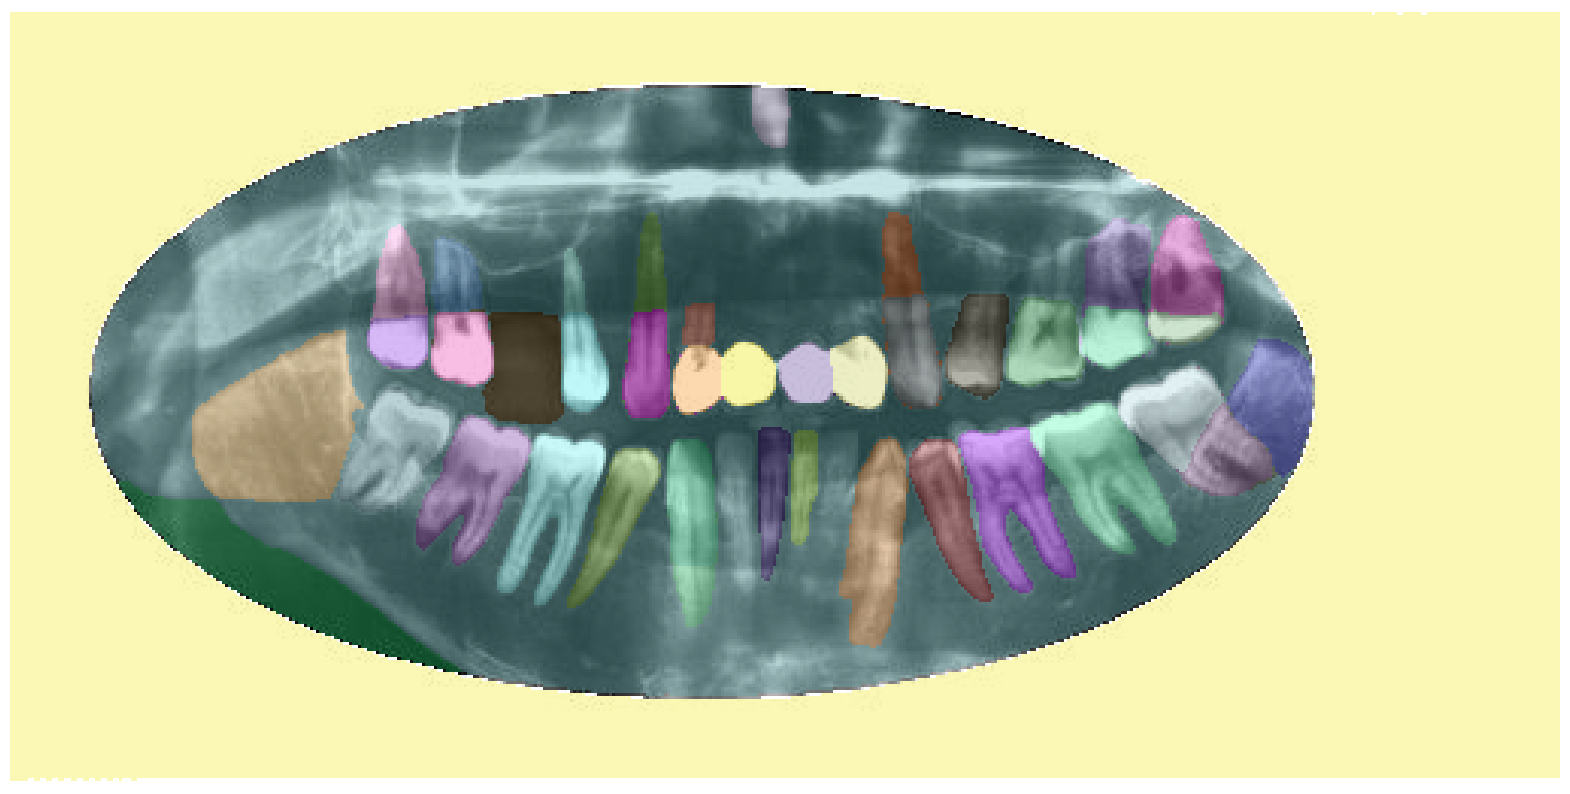

In [35]:
import numpy as np
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

* I could process the dataset up to these number of images based on my gpu capability...

In [52]:
import os
import cv2
import numpy as np
import pandas as pd
from segment_anything import SamAutomaticMaskGenerator

# Define paths
input_image_dir = r"D:\FanapFiloger\Exercise\11\dataset\train"
annotations_file = r"D:\FanapFiloger\Exercise\11\dataset\train\_annotations.csv"
output_image_dir = r"D:\FanapFiloger\Exercise\11\segmented\train"

# Initialize SAM mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

def segment_and_save_images(input_dir, output_dir, annotations_df):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    grouped_annotations = annotations_df.groupby('filename')

    for filename, group in grouped_annotations:
        image_path = os.path.join(input_dir, filename)
        
        if not os.path.isfile(image_path):
            print(f"File not found: {image_path}")
            continue
        
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        h, w, _ = image_rgb.shape
        
        masks = mask_generator.generate(image_rgb)
        
        # Process each annotation
        for index, row in group.iterrows():
            label = row['class']
            xmin, ymin, xmax, ymax = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
            
            # Define output path for each segmented part
            output_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}_{label}_segmented_{index}.jpg")

            # Create a blank image for the segmented output
            segmented_image = np.zeros_like(image_rgb)

            # Flag to track if any mask was applied
            mask_applied = False

            for mask in masks:
                mask_image = mask['segmentation'].astype(np.uint8) * 255
                
                # Resize and crop mask to fit the bounding box
                mask_resized = cv2.resize(mask_image, (w, h), interpolation=cv2.INTER_NEAREST)
                mask_cropped = mask_resized[ymin:ymax, xmin:xmax]
                
                if np.any(mask_cropped):
                    # Create a full mask for the image
                    mask_full = np.zeros((h, w), dtype=np.uint8)
                    mask_full[ymin:ymax, xmin:xmax] = mask_cropped

                    # Apply mask to the image
                    segmented_part = image_rgb.copy()
                    segmented_part[mask_full == 0] = 0

                    # Combine the segmented part
                    segmented_image = cv2.bitwise_or(segmented_image, segmented_part)
                    mask_applied = True

            # Save the segmented part only if a mask was applied
            if mask_applied:
                cv2.imwrite(output_path, cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
        
        print(f"Processed and saved segmented images for {filename}")

# Process and save images based on annotations
annotations_df = pd.read_csv(annotations_file)
segment_and_save_images(input_image_dir, output_image_dir, annotations_df)

Processed and saved segmented images for 0001_jpg.rf.30a42966fb9c51553f6949b70234218d.jpg

Processed and saved segmented images for 0001_jpg.rf.57229a11e925669019e179341e22c97a.jpg

Processed and saved segmented images for 0001_jpg.rf.f94abcb7858bb419a7202ef60ef95bd6.jpg

Processed and saved segmented images for 0002_jpg.rf.1a9d8354add8d9f605c343abe1f4989a.jpg

Processed and saved segmented images for 0002_jpg.rf.2e43cdc29b00e6a96296e8e519dc4358.jpg

Processed and saved segmented images for 0002_jpg.rf.625f03692e32d2b43b4671021ba31f80.jpg

Processed and saved segmented images for 0006_jpg.rf.3247261244fe482ceba35bd771f399aa.jpg

Processed and saved segmented images for 0006_jpg.rf.61c67622b420b16bf862f7b4811df532.jpg

Processed and saved segmented images for 0010_jpg.rf.176bad8935c67e2187659bcebc3554d7.jpg

Processed and saved segmented images for 0010_jpg.rf.61c97bc4101011d167d3b29a18d26bfc.jpg

Processed and saved segmented images for 0011_jpg.rf.0bf9a9f6be73ff54a29df973355906c8.jpg


KeyboardInterrupt: 

In [55]:
# Segment and save the test set
input_image_dir = r"dataset\test"
annotations_file = r"dataset\test\_annotations.csv"
output_image_dir = r"segmented\test"

annotations_df = pd.read_csv(annotations_file)
segment_and_save_images(input_image_dir, output_image_dir, annotations_df)

Processed and saved segmented images for 0004_jpg.rf.6434bfce7667ea786e5f251dc0d8b8b1.jpg

Processed and saved segmented images for 0007_jpg.rf.3699155bba57d7aecb1aa801a698ba20.jpg

Processed and saved segmented images for 0009_jpg.rf.957a0a16c5101765b0679e95eb9619a3.jpg

Processed and saved segmented images for 0038_jpg.rf.e13603a0be37e61c53a3b781040ce9f7.jpg

Processed and saved segmented images for 0053_jpg.rf.0a39e4969cb730a0e08d415d819e14d9.jpg

Processed and saved segmented images for 0060_jpg.rf.f094ea29e65bf0c78188acbcbc5c8dcd.jpg

Processed and saved segmented images for 0061_jpg.rf.3188dc5179f4b6d600459b1aeba93e87.jpg

Processed and saved segmented images for 0074_jpg.rf.bc31f3d89ccb17453e7558a14bd6d5de.jpg

Processed and saved segmented images for 0081_jpg.rf.b8e53bd80056c633065450a6800872b2.jpg

Processed and saved segmented images for 0095_jpg.rf.d7773e0afb13f54a3e6244079b483ab2.jpg

Processed and saved segmented images for 0128_jpg.rf.717cd6a69102c36ff5b84b4a87c5a210.jpg


KeyboardInterrupt: 

In [56]:
# Segment and save the validation set
input_image_dir = r"dataset\valid"
annotations_file = r"dataset\valid\_annotations.csv"
output_image_dir = r"segmented\validation"

annotations_df = pd.read_csv(annotations_file)
segment_and_save_images(input_image_dir, output_image_dir, annotations_df)

Processed and saved segmented images for 0003_jpg.rf.ca9d51a22c825737b49a5f73d3172d23.jpg

Processed and saved segmented images for 0021_jpg.rf.0d2cd31b4786f6121d2241aa8c595bf9.jpg

Processed and saved segmented images for 0035_jpg.rf.386d686c55e9347823a6e3e75af5152e.jpg

Processed and saved segmented images for 0041_jpg.rf.45bc3049f99113cefd018e407df2415f.jpg


KeyboardInterrupt: 

In [72]:
print("Train labels:", test_labels)
print("Label to index mapping:", label_to_idx)

Train labels: ['Fillings' 'Fillings' 'Fillings' 'Implant' 'Cavity' 'Cavity'

 'Impacted Tooth' 'Cavity' 'Fillings' 'Impacted Tooth' 'Implant' 'Cavity'

 'Cavity' 'Implant' 'Implant' 'Implant' 'Impacted Tooth' 'Impacted Tooth'

 'Impacted Tooth' 'Impacted Tooth' 'Fillings' 'Fillings' 'Fillings'

 'Fillings' 'Fillings' 'Fillings' 'Fillings' 'Fillings' 'Fillings'

 'Fillings' 'Fillings' 'Fillings' 'Implant' 'Implant' 'Implant' 'Implant'

 'Implant' 'Implant' 'Implant' 'Implant' 'Cavity' 'Cavity' 'Fillings'

 'Fillings' 'Fillings' 'Fillings' 'Fillings' 'Implant' 'Implant' 'Implant'

 'Cavity' 'Fillings' 'Fillings' 'Fillings' 'Fillings' 'Implant' 'Implant'

 'Fillings' 'Fillings' 'Fillings' 'Fillings' 'Fillings' 'Fillings'

 'Fillings' 'Fillings' 'Implant' 'Implant' 'Implant' 'Implant' 'Implant'

 'Impacted Tooth' 'Impacted Tooth' 'Fillings' 'Implant' 'Implant'

 'Implant' 'Implant' 'Implant' 'Implant' 'Cavity' 'Cavity' 'Fillings'

 'Fillings' 'Fillings' 'Fillings' 'Fillings' 'Fillings' 'Fi

In [79]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define paths
data_dir = r"D:\FanapFiloger\Exercise\11\segmented"
folders = ["train", "test", "validation"]

# Function to extract label from filename
def extract_label_from_filename(filename):
    parts = filename.split('_')
    # Extract the label from the filename.
    if len(parts) > 2:
        return parts[2]  # Assumes label is the third part in filename split by '_'
    return 'unknown'  # Default if the label cannot be extracted

# Prepare data
def load_data_from_folder(folder):
    data = []
    labels = []
    
    for file in os.listdir(folder):
        if file.endswith(".jpg"):
            label = extract_label_from_filename(file)  # Extract label using the function
            image_path = os.path.join(folder, file)
            image = load_img(image_path)
            image = img_to_array(image)
            data.append(image)
            labels.append(label)
    
    return np.array(data), np.array(labels)

# Load data from each folder
train_data, train_labels = load_data_from_folder(os.path.join(data_dir, "train"))
test_data, test_labels = load_data_from_folder(os.path.join(data_dir, "test"))
val_data, val_labels = load_data_from_folder(os.path.join(data_dir, "validation"))

In [80]:
# Normalize the image data
train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0
val_data = val_data.astype("float32") / 255.0

# Convert labels to one-hot encoding
unique_labels = np.unique(train_labels)
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}

train_labels = to_categorical([label_to_idx[label] for label in train_labels], num_classes=len(unique_labels))
test_labels = to_categorical([label_to_idx[label] for label in test_labels], num_classes=len(unique_labels))
val_labels = to_categorical([label_to_idx[label] for label in val_labels], num_classes=len(unique_labels))

# Data augmentation (optional, recommended for training)
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Fit the data generator to the training data
train_datagen.fit(train_data)

# Prepare the final data generators for training, validation, and testing
train_generator = train_datagen.flow(train_data, train_labels, batch_size=32)
val_generator = ImageDataGenerator().flow(val_data, val_labels, batch_size=32)
test_generator = ImageDataGenerator().flow(test_data, test_labels, batch_size=32)

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(unique_labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
input_shape = (512, 256, 3)  # Image dimensions (height, width, channels)
num_classes = len(unique_labels)

model = create_model(input_shape, num_classes)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/20


C:\Users\Maryam\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.

  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5644 - loss: 1.0588 - val_accuracy: 0.6749 - val_loss: 0.9259

Epoch 2/20

37/37 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6578 - loss: 0.9391 - val_accuracy: 0.6749 - val_loss: 0.8858

Epoch 3/20

37/37 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.6738 - loss: 0.9079 - val_accuracy: 0.6784 - val_loss: 0.9271

Epoch 4/20

37/37 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6608 - loss: 0.8747 - val_accuracy: 0.6749 - val_loss: 0.8722

Epoch 5/20

37/37 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6731 - loss: 0.8821 - val_accuracy: 0.6643 - val_loss: 0.8871

Epoch 6/20

37/37 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.6498 - loss: 0.8834 - val_accuracy: 0.6749 - val_loss: 0.8621

Epoch 7/20

37/37 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6514 - loss: 0.8701 - val_accuracy: 0.6749 - val_loss: 0.8567

Epoch 8/20

37/37 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.6466 - loss: 0.8286 - val_accuracy: 0.6749 - val_lo

In [84]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.7872 - loss: 0.5711

Test Loss: 0.5748648643493652

Test Accuracy: 0.7809187173843384


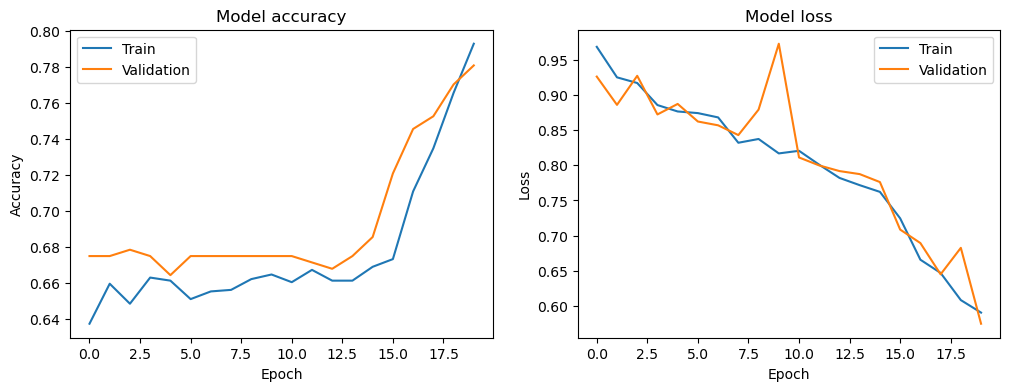

In [85]:
# Plot learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()